In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import names
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

In [2]:
def letters_only(astr):
    for c in astr:
        if not c.isalpha():
            return False
    
    return True

In [5]:
cv = CountVectorizer(stop_words="english",max_features=500)
groups = fetch_20newsgroups()
cleaned = []
all_names = set(names.words())
lemmatizer = WordNetLemmatizer()

In [8]:
for post in groups.data:
    cleaned.append(' '.join([
        lemmatizer.lemmatize(word.lower())
        for word in post.split()
        if letters_only(word)
        and word not in all_names]))

In [9]:
transformed = cv.fit_transform(cleaned)
print(cv.get_feature_names())

['able', 'accept', 'access', 'according', 'act', 'action', 'actually', 'add', 'address', 'ago', 'agree', 'algorithm', 'allow', 'american', 'anonymous', 'answer', 'anybody', 'apple', 'application', 'apr', 'arab', 'area', 'argument', 'armenian', 'article', 'ask', 'asked', 'assume', 'atheist', 'attack', 'attempt', 'available', 'away', 'bad', 'based', 'basic', 'belief', 'believe', 'best', 'better', 'bible', 'big', 'bike', 'bit', 'black', 'board', 'body', 'book', 'box', 'build', 'bus', 'business', 'buy', 'ca', 'california', 'called', 'came', 'car', 'card', 'care', 'carry', 'case', 'cause', 'center', 'certain', 'certainly', 'chance', 'change', 'check', 'child', 'chip', 'christian', 'church', 'city', 'claim', 'clear', 'clipper', 'code', 'college', 'color', 'come', 'coming', 'command', 'comment', 'common', 'communication', 'company', 'computer', 'computing', 'consider', 'considered', 'contact', 'control', 'controller', 'copy', 'correct', 'cost', 'country', 'couple', 'course', 'cover', 'create'

In [17]:
km = KMeans(n_clusters=20)
km.fit(transformed)
labels = groups.target

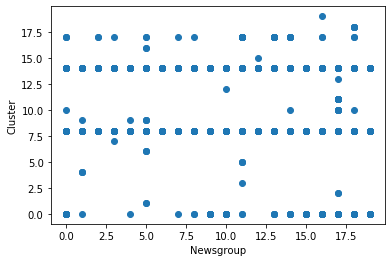

In [18]:
plt.scatter(labels,km.labels_)
plt.xlabel('Newsgroup')
plt.ylabel('Cluster')
plt.show()